In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [4]:
# drop unnecessary feature 

df.drop(axis=1, columns=['Unnamed: 0','year','month'],inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

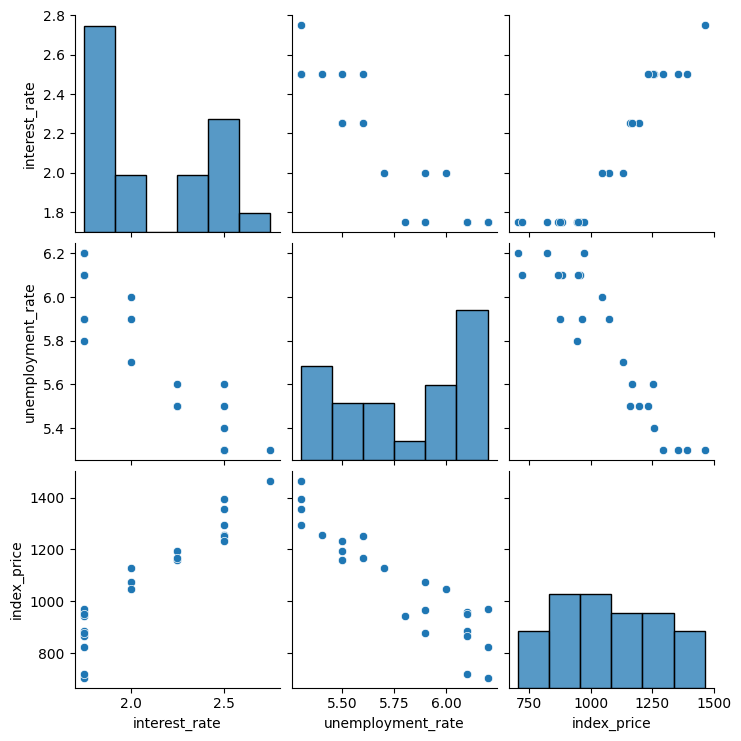

In [7]:
sns.pairplot(df)

<Axes: >

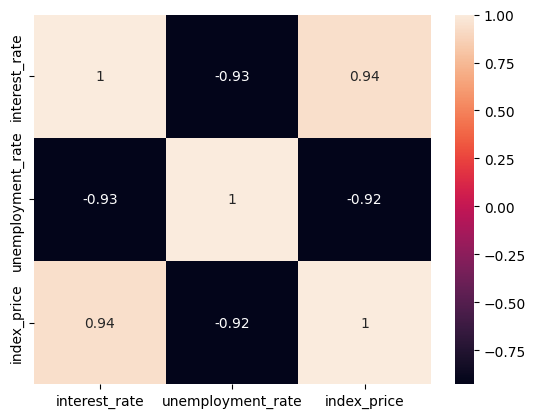

In [8]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='interest_rate', ylabel='index_price'>

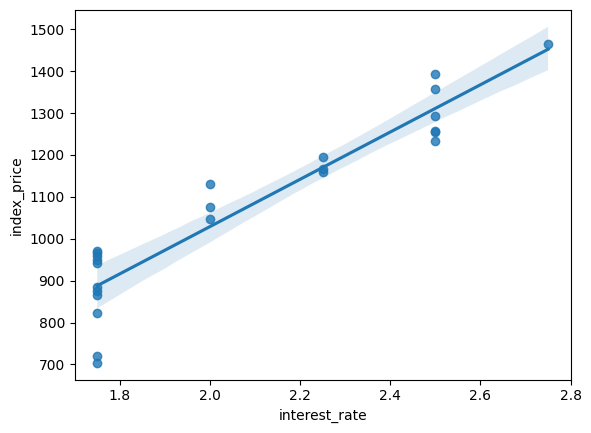

In [9]:
sns.regplot(x = df['interest_rate'],y = df['index_price'])

In [10]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [11]:
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

# can do the same thing using df.iloc[]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler



In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# cross validation 

from sklearn.model_selection import cross_val_score

val_score = cross_val_score(model,X_train,y_train,cv=3)
print(val_score)

[0.88655981 0.82341664 0.85304513]


In [17]:
print(round(np.mean(val_score) * 100,2))

85.43


In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [20]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
rmse = root_mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
adj_r2 = (1 - (1 - r2)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1]-1)) 

print(mse,mae,rmse,r2,adj_r2,sep="\n\n")

6957.105303258833

71.71878409976625

83.40926389351985

0.8566798221980603

0.7133596443961205


# Assumptions

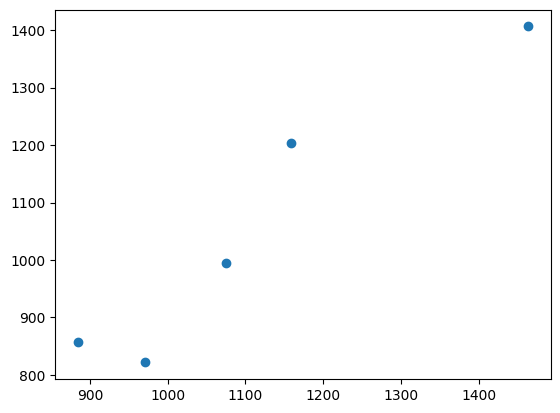

In [ ]:
plt.scatter(y_test,y_pred)
# if linear connection - model is good 

In [23]:
residuals = y_test - y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


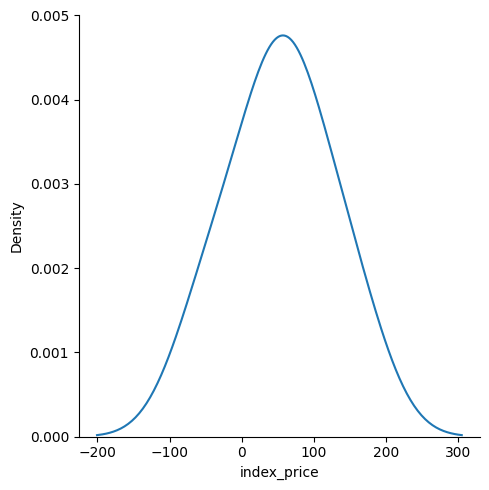

In [ ]:
sns.displot(residuals,kind='kde')
# if normal distribution -> model is good 

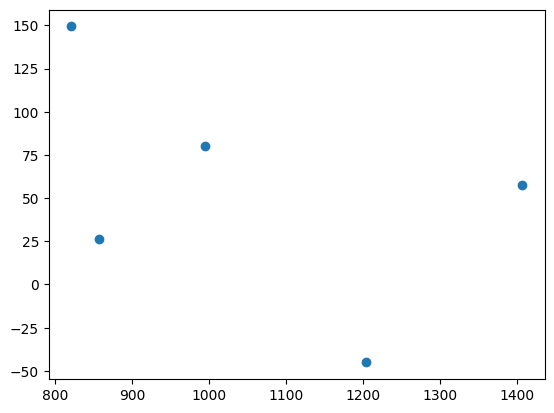

In [ ]:
plt.scatter(y_pred,residuals)
# if there is no patter or uniformly distributed - model is good 